# TP1 Machine Learning
## Algorithme KNN
### 1- Analyse de données

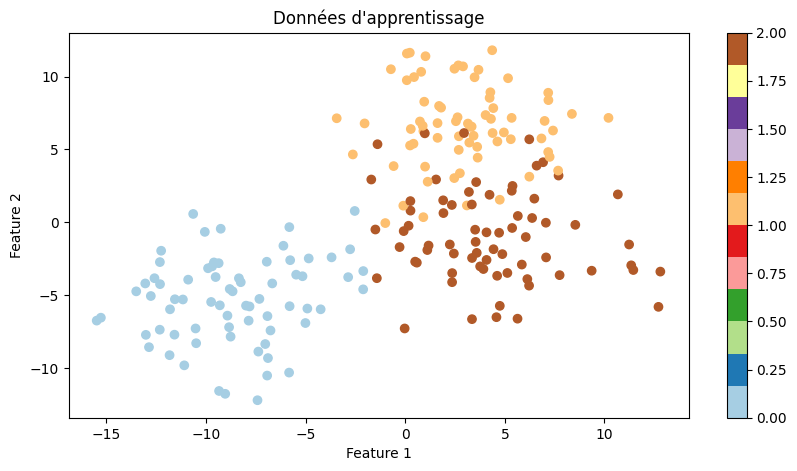

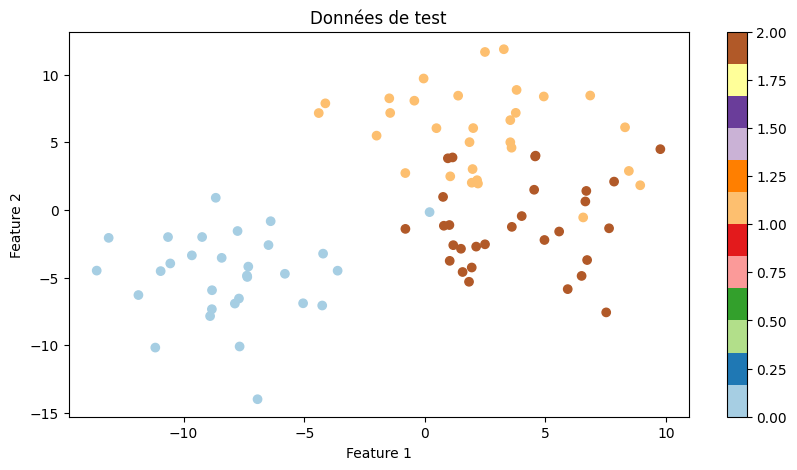

Dimension des exemples (features): 2
Nombre de classes: 3
Nombre d'exemples d'apprentissage: 210
Nombre d'exemples de test: 90


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = np.loadtxt("dataset.dat")

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('Données d\'apprentissage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title('Données de test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

print("Dimension des exemples (features):", X.shape[1])
print("Nombre de classes:", len(np.unique(y)))
print("Nombre d'exemples d'apprentissage:", len(X_train))
print("Nombre d'exemples de test:", len(X_test))


### 2-	Algorithme du plus-proche-voisin

#### a)	Définir un classifieur du (1-)plus-proche-voisin : 

Le classifieur des k plus proches voisins (k-NN) est un algorithme d'apprentissage automatique simple et efficace utilisé pour la classification et la régression

In [2]:
from sklearn.neighbors import KNeighborsClassifier

one_NN = KNeighborsClassifier(n_neighbors=1)

#### b)	Le régler sur la base d’apprentissage (fonction fit).

In [3]:
one_NN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### c)	Evaluer le taux de reconnaissance le taux de reconnaissance sur les bases d’apprentissage et de test (fonction score). Déterminer la matrice de confusion.

In [5]:
from sklearn.metrics import confusion_matrix

train_accuracy = one_NN.score(X_train, y_train)
print("le taux de reconnaissance sur la base d'apprentissage:", train_accuracy)

test_accuracy = one_NN.score(X_test, y_test)
print("le taux de reconnaissance sur la base de test:", test_accuracy)

y_pred = one_NN.predict(X_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)


le taux de reconnaissance sur la base d'apprentissage: 1.0
le taux de reconnaissance sur la base de test: 0.8222222222222222
Matrice de confusion:
[[29  0  1]
 [ 0 21  9]
 [ 0  6 24]]


#### d)	Afficher les frontières de décision définies par les données d’apprentissage. Vérifier qu’elles correspondent à l’attendu.

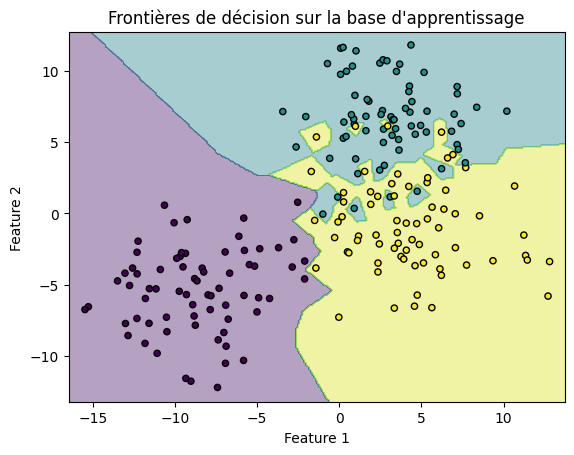

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer les frontières de décision
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Frontières de décision sur la base d\'apprentissage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### e)	Afficher les frontières de décisions et les données de test. Retrouver les erreurs de classification.

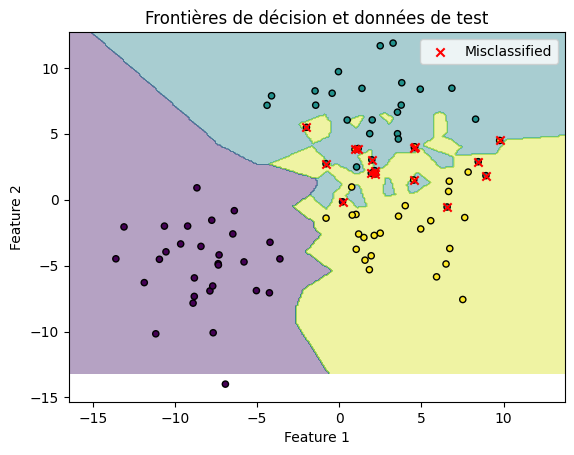

Taux de reconnaissance sur les données de test: 0.8222222222222222


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

y_pred_test = one_NN.predict(X_test)
misclassified = X_test[y_test != y_pred_test]

# Tracer les frontières de décision et les données de test
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.scatter(misclassified[:, 0], misclassified[:, 1], c='red', marker='x', label='Misclassified')
plt.title('Frontières de décision et données de test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Calculer le taux de reconnaissance sur les données de test
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Taux de reconnaissance sur les données de test:", test_accuracy)


### 3-	Analyse du fonctionnement de l’algorithme

#### a)	On utilise toute la base de test. Générer une base d’apprentissage X_train1 dont la taille varie de 1% à 100% de X_train. Evaluer l’algorithme du ppv sur X_test, en utilisant X_train1. Stocker le taux de reconnaissance. Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples d’apprentissage). Expliquer l’influence du nombre d’exemples d’apprentissage sur le taux de reconnaissance et le temps de classification.

Temps de classification pour 2 exemples d'apprentissage : 0.3975400924682617 secondes
Temps de classification pour 4 exemples d'apprentissage : 0.03881216049194336 secondes
Temps de classification pour 6 exemples d'apprentissage : 0.0025701522827148438 secondes
Temps de classification pour 8 exemples d'apprentissage : 0.0023729801177978516 secondes
Temps de classification pour 10 exemples d'apprentissage : 0.005939960479736328 secondes
Temps de classification pour 12 exemples d'apprentissage : 0.002270936965942383 secondes
Temps de classification pour 14 exemples d'apprentissage : 0.002133607864379883 secondes
Temps de classification pour 16 exemples d'apprentissage : 0.00480198860168457 secondes
Temps de classification pour 18 exemples d'apprentissage : 0.002400636672973633 secondes
Temps de classification pour 21 exemples d'apprentissage : 0.020967960357666016 secondes
Temps de classification pour 23 exemples d'apprentissage : 0.002579927444458008 secondes
Temps de classification pou

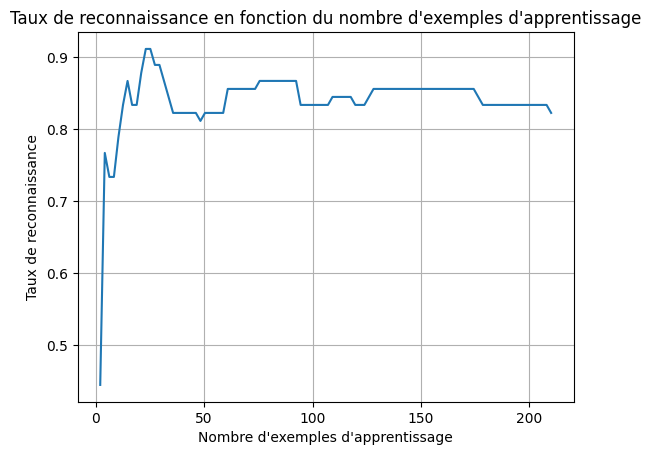

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

train_sizes = np.linspace(0.01, 1, 100)
accuracies = []

for train_size in train_sizes:
    X_train1_size = int(len(X_train) * train_size)
    X_train1 = X_train[:X_train1_size]
    y_train1 = y_train[:X_train1_size]
    
    one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
    start_time = time.time()
    one_NN.fit(X_train1, y_train1)
    y_pred_test = one_NN.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies.append(accuracy)
    print(f"Temps de classification pour {X_train1_size} exemples d'apprentissage : {end_time - start_time} secondes")

# Tracer le graphe du taux de reconnaissance en fonction du nombre d'exemples d'apprentissage
plt.plot(train_sizes * len(X_train), accuracies)
plt.title('Taux de reconnaissance en fonction du nombre d\'exemples d\'apprentissage')
plt.xlabel('Nombre d\'exemples d\'apprentissage')
plt.ylabel('Taux de reconnaissance')
plt.grid(True)
plt.show()


#### b)	On utilise toute la base d’apprentissage. Générer une base de test X_test1 dont la taille varie de 1% à 100% de X_test. Evaluer l’algorithme du ppv sur X_test1, en utilisant X_train. Stocker le taux de reconnaissance. Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples de test). Expliquer l’influence du nombre d’exemples de test sur le taux de reconnaissance.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


test_sizes = np.linspace(0.01, 1, 100)
accuracies = []
print()
for test_size in test_sizes:
    X_test1_size = int(len(X_test) * test_size)
    X_test1 = X_test[:X_test1_size]
    y_test1 = y_test[:X_test1_size]
    one_NN = KNeighborsClassifier(n_neighbors=1)
    one_NN.fit(X_train, y_train)
    start_time = time.time()
    y_pred_test1 = one_NN.predict(X_test1)
    end_time = time.time()
    
    accuracy = accuracy_score(y_test1, y_pred_test1)
    accuracies.append(accuracy)
    print(X_train, X_test)
    print(f"Temps de classification pour {X_test1_size} exemples de test : {end_time - start_time} secondes")

# Tracer le graphe du taux de reconnaissance en fonction du nombre d'exemples de test
#plt.plot(test_sizes * len(X_test), accuracies)
#plt.title('Taux de reconnaissance en fonction du nombre d\'exemples de test')
#plt.xlabel('Nombre d\'exemples de test')
#plt.ylabel('Taux de reconnaissance')
#plt.grid(True)
#plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by KNeighborsClassifier.

### 4-	Algorithme des k-ppv
#### a)	Tester la fonction KNeighborsClassifier en faisant varier le paramètre k de 1 à une valeur maximum kmax choisie judicieusement et justifiée.
